# Topic Modelling is an unsupervised Learning Algorithm  


Dataset Used :  Zomato restaurant reviews

#Import data into Google collab

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=1VTLjoRFCqQoreLzmnGdxovksdmPZj7Z6'

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1VTLjoRFCqQoreLzmnGdxovksdmPZj7Z6


In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Restaurant reviews.csv')  
df = pd.read_csv('Restaurant reviews.csv')
# Dataset is now stored in a Pandas Dataframe

#Import packages

In [ ]:
#Importing Required Plugins
import pandas as pd
import numpy as np
#load csv file to Pandas Dataframe 
df = pd.read_csv('Restaurant reviews.csv', index_col = 0)

In [ ]:
df.head()

,Reviewer,Review,Rating,Metadata,Time,Pictures
Restaurant,,,,,,
Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was r...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5,"1 Review , 1 Follower",5/24/2019 22:11,0
Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


# Text Cleaning

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)


179

In [ ]:
import pandas as pd
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import numpy as np
nltk.download('stopwords')
from nltk import FreqDist
import gensim
from gensim import corpora
import os.path
import os

full_df = pd.read_csv("Restaurant reviews.csv", nrows=1000)
df = full_df[["Review"]]
df["Review"] = df["Review"].astype(str)
full_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was r...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
df["Review_lower"] = df["Review"].str.lower()
df.head()

,Review,Review_lower
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was r...","the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was r..."
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,ambience is too good for a pleasant evening. service is very prompt. food is good. over all a good experience. soumen das - kudos to the service
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,a must try.. great food great ambience. thnx for the service by pradeep and subroto. my personal recommendation is penne alfredo pasta:) ....... also the music in the background is amazing.
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.","soumen das and arun was a great guy. only because of their behavior and sincerety, and good food off course, i would like to visit this place again."
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,food is good.we ordered kodi drumsticks and basket mutton biryani. all are good. thanks to pradeep. he served well. we enjoyed here. ambience is also very good.


In [ ]:
!pip install pyLDAvis

Import the visualization libraries

In [ ]:
# Libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lets calculate num of words in the review

In [ ]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was r...",39
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,27
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,31
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",28
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,27


#Stopword removal

In [ ]:
# remove stopwords from the Review column
from nltk.corpus import stopwords
stop = stopwords.words('english')
df[''] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'].head()

0    The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was r...
1                                                           Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service
2              A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.
3                                                       Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.
4                                           Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Amb

#Common word removal


In [ ]:
from collections import Counter
cnt = Counter()
for text in df["Review"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('and', 1844),
 ('the', 1809),
 ('is', 1043),
 ('was', 940),
 ('to', 936),
 ('a', 827),
 ('of', 721),
 ('for', 645),
 ('I', 617),
 ('good', 534)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["Review"] = df["Review"].apply(lambda text: remove_freqwords(text))
df.head()

,Review,Review_lower,word_count,
0,"The ambience good, food quite . had Saturday lunch , which cost effective . Good place sate brunch. One can also chill with friends or parents. Waiter Soumen Das really courteous helpful.","the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was r...",39,"The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful."
1,Ambience too pleasant evening. Service very prompt. Food good. Over all experience. Soumen Das - kudos service,ambience is too good for a pleasant evening. service is very prompt. food is good. over all a good experience. soumen das - kudos to the service,27,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service
2,A must try.. great food great ambience. Thnx service by Pradeep Subroto. My personal recommendation Penne Alfredo Pasta:) ....... Also music in background amazing.,a must try.. great food great ambience. thnx for the service by pradeep and subroto. my personal recommendation is penne alfredo pasta:) ....... also the music in the background is amazing.,31,A must try.. great food great ambience. Thnx service Pradeep Subroto. My personal recommendation Penne Alfredo Pasta:) ....... Also music background amazing.
3,"Soumen das Arun great guy. Only because their behavior sincerety, And food off course, would like visit this place again.","soumen das and arun was a great guy. only because of their behavior and sincerety, and good food off course, i would like to visit this place again.",28,"Soumen das Arun great guy. Only behavior sincerety, And good food course, I would like visit place again."
4,Food good.we ordered Kodi drumsticks basket mutton biryani. All are good. Thanks Pradeep. He served well. We enjoyed here. Ambience also very good.,food is good.we ordered kodi drumsticks and basket mutton biryani. all are good. thanks to pradeep. he served well. we enjoyed here. ambience is also very good.,27,Food good.we ordered Kodi drumsticks basket mutton biryani. All good. Thanks Pradeep. He served well. We enjoyed here. Ambience also good.


#Rare word removal

In [ ]:
# Rare word removal from hate

freq = pd.Series(' '.join(df['Review']).split()).value_counts()[-10:]
freq

mixture          1
hassle           1
"Jumbo           1
best!            1
money....will    1
2'.              1
PDR(Private      1
sickening        1
visit..!         1
Fab              1
dtype: int64

In [ ]:
all_words = []
terms =[]

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [ ]:
# remove unwanted characters, numbers and symbols
df['Review'] = df['Review'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
# Remove short words
df['Review'] = df['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
# make entire text lowercase 
df['Review'].head()

0    The ambience good food quite had Saturday lunch which cost effective Good place sate brunch One can also chill with friends parents Waiter Soumen Das really courteous helpful
1                                                                          Ambience too pleasant evening Service very prompt Food good Over all experience Soumen Das kudos service
2                                         must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing
3                                                             Soumen das Arun great guy Only because their behavior sincerety And food off course would like visit this place again
4                                              Food good ordered Kodi drumsticks basket mutton biryani All are good Thanks Pradeep served well enjoyed here Ambience also very good
Name: Review, dtype: object

In [ ]:
# remove stopwords from the review
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review'].head()

0    The ambience good food quite Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful
1                                                                    Ambience pleasant evening Service prompt Food good Over experience Soumen Das kudos service
2                      must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing
3                                                                       Soumen das Arun great guy Only behavior sincerety And food course would like visit place
4                                         Food good ordered Kodi drumsticks basket mutton biryani All good Thanks Pradeep served well enjoyed Ambience also good
Name: Review, dtype: object

In [ ]:
# function to remove stopwords
def remove_stopwords(df):
    df = " ".join([i for i in rev if i not in stop_words])
    return df

In [ ]:
df = df[ df ['Review'].notnull()]
df.head(10)

,Review,Review_lower,word_count,
0,The ambience good food quite Saturday lunch cost effective Good place sate brunch One also chill friends parents Waiter Soumen Das really courteous helpful,"the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was r...",39,"The ambience good, food quite good . Saturday lunch , cost effective . Good place sate brunch. One also chill friends parents. Waiter Soumen Das really courteous helpful."
1,Ambience pleasant evening Service prompt Food good Over experience Soumen Das kudos service,ambience is too good for a pleasant evening. service is very prompt. food is good. over all a good experience. soumen das - kudos to the service,27,Ambience good pleasant evening. Service prompt. Food good. Over good experience. Soumen Das - kudos service
2,must try great food great ambience Thnx service Pradeep Subroto personal recommendation Penne Alfredo Pasta Also music background amazing,a must try.. great food great ambience. thnx for the service by pradeep and subroto. my personal recommendation is penne alfredo pasta:) ....... also the music in the background is amazing.,31,A must try.. great food great ambience. Thnx service Pradeep Subroto. My personal recommendation Penne Alfredo Pasta:) ....... Also music background amazing.
3,Soumen das Arun great guy Only behavior sincerety And food course would like visit place,"soumen das and arun was a great guy. only because of their behavior and sincerety, and good food off course, i would like to visit this place again.",28,"Soumen das Arun great guy. Only behavior sincerety, And good food course, I would like visit place again."
4,Food good ordered Kodi drumsticks basket mutton biryani All good Thanks Pradeep served well enjoyed Ambience also good,food is good.we ordered kodi drumsticks and basket mutton biryani. all are good. thanks to pradeep. he served well. we enjoyed here. ambience is also very good.,27,Food good.we ordered Kodi drumsticks basket mutton biryani. All good. Thanks Pradeep. He served well. We enjoyed here. Ambience also good.
5,Ambiance good service good food aPradeecp subro best service Food good Papiya hostess caption good This star restaurant,"ambiance is good, service is good, food is apradeecp and subro best service\nfood is good. papiya good hostess and ur caption very good. this is 4star restaurant.",27,"Ambiance good, service good, food aPradeecp subro best service Food good. Papiya good hostess ur caption good. This 4star restaurant."
6,Its nice place ambience different food ordered tasty service also gud worth visit Its reasonable well Really must visit place,"its a very nice place, ambience is different, all the food we ordered was very tasty, service is also gud, worth visit. its reasonable as well. really a must visit place.",31,"Its nice place, ambience different, food ordered tasty, service also gud, worth visit. Its reasonable well. Really must visit place."
7,Well reading many reviews finally visited place ambience coming food crispy corn nice Tawa fish Basket Biryani disappointed biryani flattering claimed Staff polite prompt especially pradeep Suman,well after reading so many reviews finally visited this place...ambience was so good and coming to food crispy corn is nice. tawa fish was ok... basket biryani disappointed us... biryani was ok bu...,47,Well reading many reviews finally visited place...ambience good coming food crispy corn nice. Tawa fish ok... Basket Biryani disappointed us... biryani ok flattering claimed.. Staff polite prompt ...
8,Excellent food specially like spicy food Courteous staff Shubro pradeep papiya gave excellent service corporate team dinner Overall great team dinners party,"excellent food , specially if you like spicy food . courteous staff . shubro and pradeep and papiya gave excellent service to our corporate team dinner . overall great for team dinners an

In [ ]:
!python3 -m spacy download en 

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
def lemmatization(df, tags=['NOUN', 'ADJ']):
    output = []
    for sent in df:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [ ]:
from nltk.tokenize import sent_tokenize 
tokenized_reviews = pd.Series(df['Review']).apply(lambda x: x.split())

In [ ]:
tokenized_reviews

0      [The, ambience, good, food, quite, Saturday, lunch, cost, effective, Good, place, sate, brunch, One, also, chill, friends, parents, Waiter, Soumen, Das, really, courteous, helpful]
1                                                                                 [Ambience, pleasant, evening, Service, prompt, Food, good, Over, experience, Soumen, Das, kudos, service]
2                             [must, try, great, food, great, ambience, Thnx, service, Pradeep, Subroto, personal, recommendation, Penne, Alfredo, Pasta, Also, music, background, amazing]
3                                                                                  [Soumen, das, Arun, great, guy, Only, behavior, sincerety, And, food, course, would, like, visit, place]
4                                                 [Food, good, ordered, Kodi, drumsticks, basket, mutton, biryani, All, good, Thanks, Pradeep, served, well, enjoyed, Ambience, also, good]
                                                            

In [ ]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['Ambience', 'pleasant', 'evening', 'Service', 'prompt', 'Food', 'good', 'Over', 'experience', 'Soumen', 'Das', 'kudos', 'service']


13

In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

NameError: ignored

In [ ]:
len(reviews_2[1])

9

In [ ]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'Ambience', 'Das', 'Food', 'Over', 'Service', 'Soumen', 'kudos'}

In [ ]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

In [ ]:
df[('Review')] = reviews_3

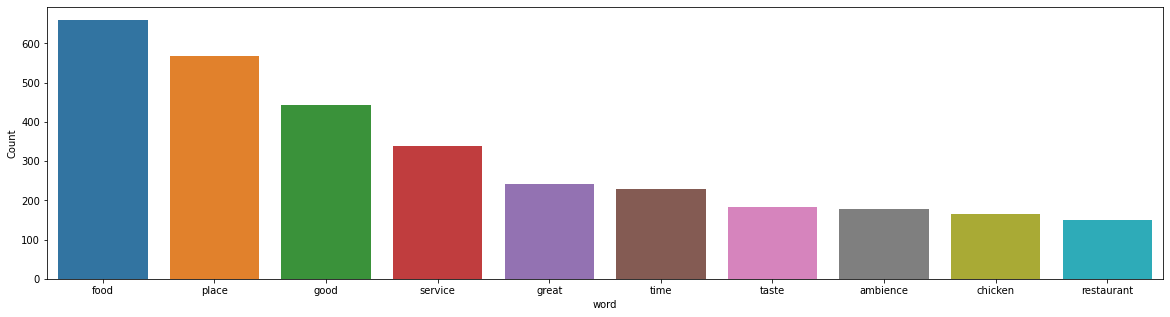

In [ ]:
freq_words(df['Review'], 10)

# Latent Dirichlet Allocation (LDA)

In [ ]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

In [ ]:
#Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [ ]:
#Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10, 
                random_state=100,
                chunksize=1000,
                passes=50)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [ ]:
lda_model.print_topics()

[(0,
  '0.032*"bad" + 0.023*"experience" + 0.018*"time" + 0.014*"food" + 0.012*"prawn" + 0.011*"order" + 0.010*"place" + 0.009*"great" + 0.009*"thing" + 0.008*"service"'),
 (1,
  '0.059*"good" + 0.027*"place" + 0.025*"service" + 0.023*"visit" + 0.021*"biryani" + 0.021*"time" + 0.020*"starter" + 0.020*"food" + 0.019*"taste" + 0.016*"beer"'),
 (2,
  '0.103*"cream" + 0.100*"ice" + 0.030*"place" + 0.018*"stone" + 0.014*"chocolate" + 0.010*"fruit" + 0.010*"icecream" + 0.009*"variety" + 0.009*"bit" + 0.007*"many"'),
 (3,
  '0.034*"taste" + 0.034*"restaurant" + 0.025*"chicken" + 0.021*"quantity" + 0.020*"quality" + 0.018*"food" + 0.017*"bad" + 0.015*"good" + 0.012*"spicy" + 0.012*"order"'),
 (4,
  '0.051*"food" + 0.044*"service" + 0.039*"place" + 0.032*"excellent" + 0.021*"time" + 0.018*"chicken" + 0.017*"staff" + 0.017*"great" + 0.014*"nice" + 0.013*"starter"'),
 (5,
  '0.041*"food" + 0.032*"good" + 0.025*"place" + 0.015*"great" + 0.012*"menu" + 0.011*"staff" + 0.011*"chicken" + 0.011*"ambie

In [ ]:
#To visualize our topics in a 2-dimensional space we will use the pyLDAvis library. 
#This visualization is interactive in nature and displays topics along with the most relevant words.

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.122351 -0.086491       1        1  22.270014
5     -0.050915 -0.046602       2        1  11.568435
4     -0.096636 -0.044302       3        1  11.391578
3     -0.006892  0.167273       4        1   9.510244
1     -0.036668 -0.065106       5        1   9.400707
7      0.024142  0.081122       6        1   9.253479
2      0.243259 -0.102833       7        1   7.536577
6     -0.022489 -0.021043       8        1   7.194727
8      0.033046  0.031032       9        1   6.781761
0      0.035505  0.086950      10        1   5.092484, topic_info=           Term        Freq       Total Category  logprob  loglift
289       cream  116.000000  116.000000  Default  30.0000  30.0000
297         ice  112.000000  112.000000  Default  29.0000  29.0000
50    excellent   56.000000   56.000000  Default  28.0000  28.0000
148         bad   73.000000   73.000000  Default  27.0000  27.0000
4          food  582.000000  582.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
40        tasty    3.989892   72.993164  Topic10  -5.2351   0.0708
34   restaurant    4.351593  130.149933  Topic10  -5.1483  -0.4207
151      option    3.499892   39.717285  Topic10  -5.3661   0.5484
89         item    3.652519   56.419125  Topic10  -5.3235   0.2400
71         menu    3.457608   54.297951  Topic10  -5.3783   0.2235

[773 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
842       2  0.623729          #
842       5  0.138606          #
842      10  0.207910          #
1841      9  0.589736   Shawarma
1977      5  0.774793      Thyme
...     ...       ...        ...
538       4  0.386446       year
311       2  0.146316  yesterday
311       4  0.585264  yesterday
311       6  0.146316  yesterday
701       6  0.885526     zomato

[1578 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 5, 4, 2, 8, 3, 7, 9, 1])

#LSA

The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
like
 
know
 
people
 
think
 
good
 
time
 
thanks
 
Topic 1: 
thanks
 
windows
 
card
 
drive
 
mail
 
file
 
advance
 
Topic 2: 
game
 
team
 
year
 
games
 
season
 
players
 
good
 
Topic 3: 
drive
 
scsi
 
disk
 
hard
 
card
 
drives
 
problem
 
Topic 4: 
windows
 
file
 
window
 
files
 
program
 
using
 
problem
 
Topic 5: 
government
 
chip
 
mail
 
space
 
information
 
encryption
 
data
 
Topic 6: 
like
 
bike
 
know
 
chip
 
sounds
 
looks
 
look
 
Topic 7: 
card
 
sale
 
video
 
offer
 
monitor
 
price
 
jesus
 
Topic 8: 
know
 
card
 
chip
 
video
 
government
 
people
 
clipper
 
Topic 9: 
good
 
know
 
time
 
bike
 
jesus
 
problem
 
work
 
Topic 10: 
think
 
chip
 
good
 
thanks
 
clipper
 
need
 
encryption
 
Topic 11: 
thanks
 
right
 
problem
 
good
 
bike
 
time
 
window
 
Topic 12: 
good
 
people
 
windows
 
know
 
file
 
sale
 
files
 
Topic 13: 
space
 
think
 
know
 
nasa
 
problem
 
year
 
israel
 
Topic 14: 
space
 
good
 
card
 
people
 
time
 
nas

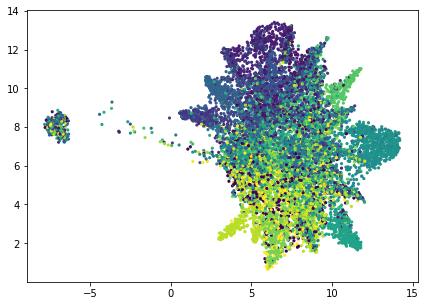

In [ ]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()